<a href="https://colab.research.google.com/github/SuperNZH/IBM-Professional-Certificate-Machine-Learning-Artifacts/blob/main/3_Classification/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Points

## Intro
1. Logistic regression mainly focus on the **binary classfication** algo
2. LR = linear regression + sigmoid act(map prediction to probility)
3. Decision Boundary will be used to seperate the outcome(Y/N, P/F etc)
4. Independent value should not be highly correlated
5. Types of it can be binary, multinomial and ordinal


# Code

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

In [2]:
path = '/content/drive/MyDrive/Colab_Notebooks/dataset/weatherAUS.csv'
data = pd.read_csv(path)

In [3]:
data.shape
(193292, 23)

(193292, 23)

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
col_names = data.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
data.drop(['RISK_MM'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198656 entries, 0 to 198655
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           198656 non-null  object 
 1   Location       198656 non-null  object 
 2   MinTemp        195647 non-null  float64
 3   MaxTemp        195849 non-null  float64
 4   Rainfall       193292 non-null  float64
 5   Evaporation    96716 non-null   float64
 6   Sunshine       88211 non-null   float64
 7   WindGustDir    183548 non-null  object 
 8   WindGustSpeed  183657 non-null  float64
 9   WindDir9am     183069 non-null  object 
 10  WindDir3pm     190469 non-null  object 
 11  WindSpeed9am   195074 non-null  float64
 12  WindSpeed3pm   191852 non-null  float64
 13  Humidity9am    194602 non-null  float64
 14  Humidity3pm    190792 non-null  float64
 15  Pressure9am    176742 non-null  float64
 16  Pressure3pm    176752 non-null  float64
 17  Cloud9am       114702 non-nul

### Seperate the Categorical and numerical variables

In [8]:
categorical = [var for var in data.columns if data[var].dtype == 'object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are: ', categorical)

There are 7 categorical variables

The categorical variables are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
data[categorical].head()

# 1 date
# 2 binary var

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [10]:
# missing values in cate vars
data[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     15108
WindDir9am      15587
WindDir3pm       8187
RainToday        5364
RainTomorrow     5364
dtype: int64

In [11]:
# Since we need use RainTomorrow as the Target value, drop all nan in RainTomorrow
data.dropna(axis=0, subset=['RainTomorrow'], inplace=True)

In [12]:
data.shape

(193292, 23)

In [13]:
cat1 = [var for var in categorical if data[var].isnull().sum()!=0]
cat1

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [14]:
# Frequency counts of categorical variables

for var in categorical:
  print(data[var].value_counts())

2014-11-19    49
2017-04-19    49
2017-04-17    49
2017-04-16    49
2017-04-15    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 4533, dtype: int64
Canberra            4514
Sydney              4427
Darwin              4289
Perth               4283
Hobart              4271
Brisbane            4219
Launceston          4125
Townsville          4123
AliceSprings        4115
Bendigo             4113
MountGambier        4107
MelbourneAirport    4106
Ballarat            4106
PerthAirport        4105
Albury              4102
SydneyAirport       4102
Mildura             4097
Nuriootpa           4097
Tuggeranong         4095
Sale                4089
Watsonia            4089
Cobar               4086
Portland            4079
Woomera             4077
Albany              4076
Penrith             4056
CoffsHarbour        4049
Richmond            4047
Wollongong          4044
GoldCoast           4044
NorfolkIsland       4026

In [15]:
# View frequency distribution of categorical variables

for var in categorical:
  print(data[var].value_counts()/np.float(len(data)))

2014-11-19    0.000254
2017-04-19    0.000254
2017-04-17    0.000254
2017-04-16    0.000254
2017-04-15    0.000254
                ...   
2007-11-29    0.000005
2007-11-28    0.000005
2007-11-27    0.000005
2007-11-26    0.000005
2008-01-31    0.000005
Name: Date, Length: 4533, dtype: float64
Canberra            0.023353
Sydney              0.022903
Darwin              0.022189
Perth               0.022158
Hobart              0.022096
Brisbane            0.021827
Launceston          0.021341
Townsville          0.021330
AliceSprings        0.021289
Bendigo             0.021279
MountGambier        0.021248
MelbourneAirport    0.021242
Ballarat            0.021242
PerthAirport        0.021237
Albury              0.021222
SydneyAirport       0.021222
Mildura             0.021196
Nuriootpa           0.021196
Tuggeranong         0.021186
Sale                0.021155
Watsonia            0.021155
Cobar               0.021139
Portland            0.021103
Woomera             0.021092
Albany    

In [16]:
# Check the cardinality

for var in categorical:
  print(var, " contains ", len(data[var].unique()), " different labels")

Date  contains  4533  different labels
Location  contains  49  different labels
WindGustDir  contains  17  different labels
WindDir9am  contains  17  different labels
WindDir3pm  contains  17  different labels
RainToday  contains  3  different labels
RainTomorrow  contains  2  different labels


### Date variable

In [17]:
# For Date variable
# parse the date as datetime format

data['Date'] = pd.to_datetime(data['Date'])

In [18]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop('Date', axis = 1, inplace = True)

In [19]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Categorical variable

In [20]:
# Process other categorical variables
cate = [var for var in data.columns if data[var].dtype == 'object']
data[cate].isnull().sum()

Location            0
WindGustDir     13516
WindDir9am      14756
WindDir3pm       7513
RainToday        1874
RainTomorrow        0
dtype: int64

In [21]:
# Process the location
print(len(data.Location.unique()))
data.Location.unique()

# One hot encoding must used for this kind of variables

49


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [22]:
# The reason of using drop_first is because of Im trying to reduce the corelation between variables
# And T/F actually contain same information, just reduce the complexity
# to some extent, drop_first may not improve the performance
pd.get_dummies(data['Location'], drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# WindGustDir

print(data['WindGustDir'].unique())
print(data['WindGustDir'].value_counts())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
W      13385
SE     12319
WSW    12159
S      12112
N      12099
E      12033
SSW    12033
SSE    11916
SW     11815
WNW    10993
ENE    10850
NW     10738
ESE     9897
NE      9620
NNW     8933
NNE     8874
Name: WindGustDir, dtype: int64


In [24]:
pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    10850
ESE     9897
N      12099
NE      9620
NNE     8874
NNW     8933
NW     10738
S      12112
SE     12319
SSE    11916
SSW    12033
SW     11815
W      13385
WNW    10993
WSW    12159
NaN    13516
dtype: int64

In [26]:
print(data['WindDir3pm'].unique())
print(data['WindDir3pm'].value_counts())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
SE     13935
W      13439
S      12767
WSW    12732
SW     12194
SSE    12036
WNW    11826
N      11538
NW     11324
ESE    11185
NE     11105
SSW    11019
E      10925
ENE    10414
NNW    10394
NNE     8946
Name: WindDir3pm, dtype: int64


In [27]:
pd.get_dummies(data['WindDir3pm'], drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
pd.get_dummies(data.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    10414
ESE    11185
N      11538
NE     11105
NNE     8946
NNW    10394
NW     11324
S      12767
SE     13935
SSE    12036
SSW    11019
SW     12194
W      13439
WNW    11826
WSW    12732
NaN     7513
dtype: int64

In [29]:
# Process the RainToday

print(data['RainToday'].unique())
print(data['RainToday'].value_counts())

['No' 'Yes' nan]
No     149917
Yes     41501
Name: RainToday, dtype: int64


In [30]:
pd.get_dummies(data.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Numerical variable

In [31]:
# Find numerical variables

numerical = [var for var in data.columns if data[var].dtype != "object"]
print('There are ', len(numerical), " different numerical variables")
print('The numerical variables are: ', numerical)

There are  19  different numerical variables
The numerical variables are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [32]:
data[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [33]:
# Check the missing values in numerical variables

data[numerical].isnull().sum()

MinTemp            1043
MaxTemp             659
Rainfall           1874
Evaporation       98007
Sunshine         106397
WindGustSpeed     13411
WindSpeed9am       2998
WindSpeed3pm       6165
Humidity9am        2135
Humidity3pm        5868
Pressure9am       20731
Pressure3pm       20729
Cloud9am          80075
Cloud3pm          86019
Temp9am            1149
Temp3pm            4872
Year                  0
Month                 0
Day                   0
dtype: int64

In [34]:
# Outliers in numerical variables

data[numerical].describe()

# Columns contain outliers: Rainfall, Evaporation, WindSpeed9om, WindSpeed3pm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,192249.000000,192633.000000,191418.000000,95285.000000,86895.000000,179881.000000,190294.000000,187127.000000,191157.000000,187424.000000,172561.000000,172563.000000,113217.000000,107273.000000,192143.000000,188420.000000,193292.000000,193292.000000,193292.000000
mean,12.029190,23.208904,2.260226,5.509516,7.635533,40.021125,13.994729,18.622267,68.645135,51.006173,1017.806444,1015.392032,4.583260,4.594511,16.877304,21.681361,2014.693841,6.478478,15.723589
std,6.437587,7.144854,8.342277,4.228569,3.762839,13.604582,8.899172,8.761168,19.538823,21.053014,7.071122,7.011675,2.897149,2.751541,6.540075,6.993430,3.822025,3.409604,8.795856
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,7.400000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,56.000000,36.000000,1013.100000,1010.600000,1.000000,2.000000,12.100000,16.600000,2011.000000,4.000000,8.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.800000,1015.300000,5.000000,5.000000,16.600000,21.100000,2014.000000,6.000000,16.000000
75%,16.700000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.600000,1020.200000,7.000000,7.000000,21.500000,26.400000,2018.000000,9.000000,23.000000
max,33.900000,48.900000,474.000000,138.700000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,2021.000000,12.000000,31.000000


Text(0, 0.5, 'WindSpeed3pm')

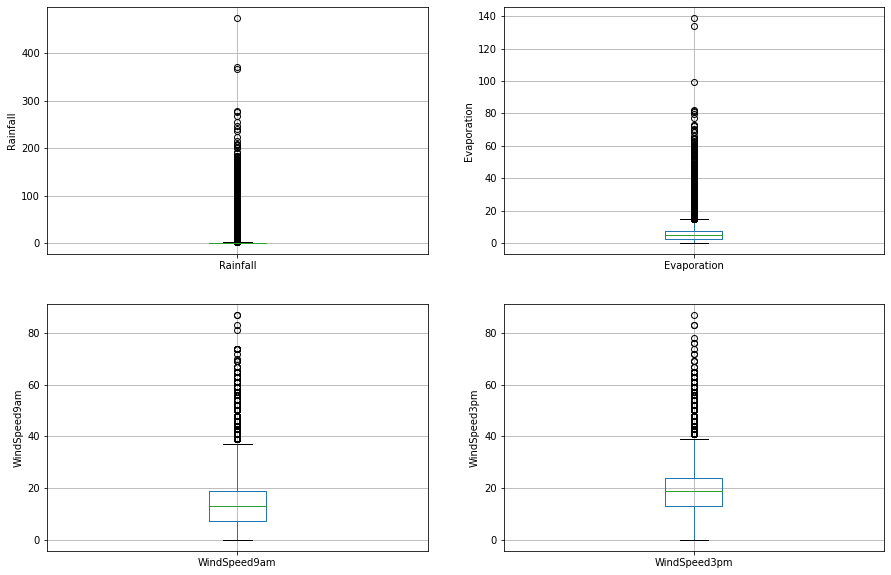

In [35]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

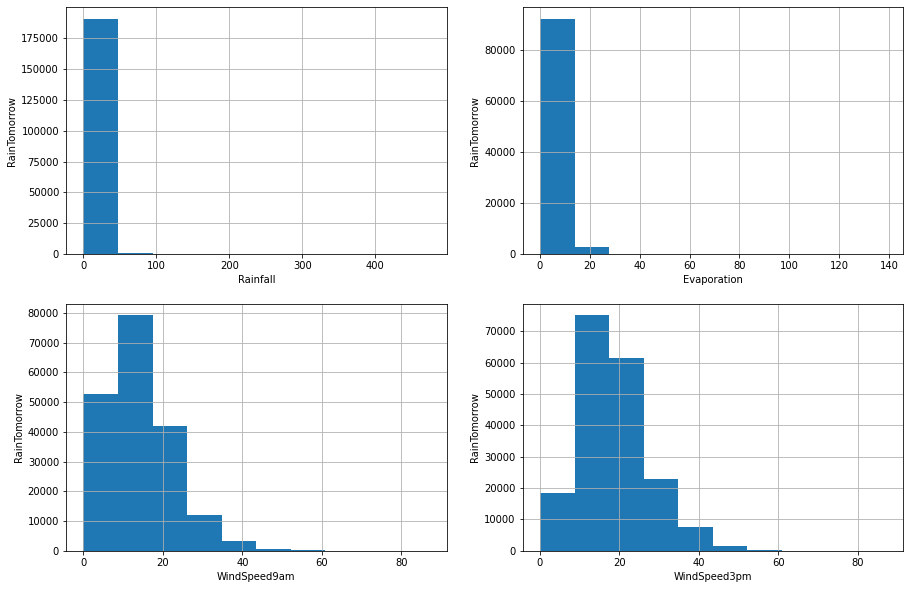

In [36]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [37]:
# find outliers for Rainfall variable

IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for Evaporation variable

IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed9am variable

IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


## Feature vector and target variable

In [38]:
X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

## Split data into train and test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("The Data Size: ", X_train.shape, X_test.shape)

The Data Size:  (154633, 24) (38659, 24)


## Feature Engineering

In [40]:
# Check the data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [41]:
# Display categorical and numerical variables

categorical = [var for var in X_train.columns if X_train[var].dtypes == 'object']
print(categorical)

numerical = [var for var in X_train.columns if X_train[var].dtypes != 'object']
print(numerical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


### Engineering the missing values in numerical features

In [42]:
X_train[numerical].isnull().sum()

MinTemp            815
MaxTemp            509
Rainfall          1512
Evaporation      78467
Sunshine         85234
WindGustSpeed    10719
WindSpeed9am      2408
WindSpeed3pm      4940
Humidity9am       1713
Humidity3pm       4686
Pressure9am      16516
Pressure3pm      16516
Cloud9am         64195
Cloud3pm         68869
Temp9am            924
Temp3pm           3889
Year                 0
Month                0
Day                  0
dtype: int64

In [43]:
X_test[numerical].isnull().sum()

MinTemp            228
MaxTemp            150
Rainfall           362
Evaporation      19540
Sunshine         21163
WindGustSpeed     2692
WindSpeed9am       590
WindSpeed3pm      1225
Humidity9am        422
Humidity3pm       1182
Pressure9am       4215
Pressure3pm       4213
Cloud9am         15880
Cloud3pm         17150
Temp9am            225
Temp3pm            983
Year                 0
Month                0
Day                  0
dtype: int64

In [44]:
# output the percentage of missing values in the numerical variables in training set

for var in numerical:
  if X_train[var].isnull().mean()>0:
    print(var, (round(X_train[var].isnull().mean(), 4))*100, "%")

MinTemp 0.53 %
MaxTemp 0.33 %
Rainfall 0.98 %
Evaporation 50.739999999999995 %
Sunshine 55.120000000000005 %
WindGustSpeed 6.93 %
WindSpeed9am 1.5599999999999998 %
WindSpeed3pm 3.19 %
Humidity9am 1.11 %
Humidity3pm 3.0300000000000002 %
Pressure9am 10.68 %
Pressure3pm 10.68 %
Cloud9am 41.510000000000005 %
Cloud3pm 44.54 %
Temp9am 0.6 %
Temp3pm 2.5100000000000002 %


In [45]:
# two ways to impute the missing values
# The 1st is mean or median imputation
# The 2nd is random sample imputation

# The reason why choosing median imputation is because there are outliers in the dataset

for df1 in [X_train, X_test]:
  for col in numerical:
    col_median = X_train[col].median()
    df1[col].fillna(col_median, inplace = True)

In [46]:
print(X_train[numerical].isnull().sum())
print(X_test[numerical].isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


### Engineering the missing values in categorical variables

In [47]:
print("Missing values percent in categorical variables")

for col in categorical:
  if X_train[col].isnull().mean()>0:
    print(col, round(X_train[col].isnull().mean(), 4)*100, "%")

Missing values percent in categorical variables
WindGustDir 6.99 %
WindDir9am 7.64 %
WindDir3pm 3.8899999999999997 %
RainToday 0.98 %


In [48]:
X_train['WindGustDir'].mode()

0    W
dtype: object

In [49]:
# Impute missing categorical variables with most frequent values
for feature in [X_train, X_test]:
  feature['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
  feature['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
  feature['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
  feature['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [50]:
# Check the missing values again
print(X_train[categorical].isnull().sum())
print(X_test[categorical].isnull().sum())

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


### Engineering outliers in numerical variables

In [51]:
# Columns contain outliers: Rainfall, Evaporation, WindSpeed9om, WindSpeed3pm
# top-coding approach to cap maximum values and remove outliers from the above variables

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for feature in [X_train, X_test]:
    feature['Rainfall'] = max_value(feature, 'Rainfall', 3.2)
    feature['Evaporation'] = max_value(feature, 'Evaporation', 21.8)
    feature['WindSpeed9am'] = max_value(feature, 'WindSpeed9am', 55)
    feature['WindSpeed3pm'] = max_value(feature, 'WindSpeed3pm', 57)

In [52]:
print("TrainMax - TestMax")
print(X_train.Rainfall.max(), "  -  ", X_test.Rainfall.max())
print(X_train.Evaporation.max(), "  -  ", X_test.Evaporation.max())
print(X_train.WindSpeed9am.max(), "  -  ", X_test.WindSpeed9am.max())
print(X_train.WindSpeed3pm.max(), "  -  ", X_test.WindSpeed3pm.max())

TrainMax - TestMax
3.2   -   3.2
21.8   -   21.8
55.0   -   55.0
57.0   -   57.0


In [53]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000
mean,12.024892,23.200934,0.655117,5.121896,8.112314,39.978982,13.997381,18.649383,68.633371,51.036777,1017.794673,1015.374121,4.756184,4.773897,16.874498,21.659626,2014.692511,6.479419,15.725304
std,6.417411,7.137961,1.170719,2.630952,2.559172,13.138678,8.819208,8.616947,19.427392,20.731445,6.692669,6.632868,2.224888,2.058803,6.519638,6.911131,3.823744,3.411231,8.798520
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.000000,-5.100000,2007.000000,1.000000,1.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.700000,1011.200000,4.000000,5.000000,12.200000,16.700000,2011.000000,4.000000,8.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.800000,1015.300000,5.000000,5.000000,16.600000,21.100000,2014.000000,6.000000,16.000000
75%,16.700000,28.200000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1022.000000,1019.500000,6.000000,6.000000,21.400000,26.300000,2018.000000,9.000000,23.000000
max,32.800000,48.900000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.100000,1040.100000,8.000000,9.000000,39.400000,48.200000,2021.000000,12.000000,31.000000


### Encode categorical variables

In [54]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
17042,Moree,WSW,SW,SW,No
57013,Williamtown,W,NNE,NW,Yes
81936,Bendigo,N,ENE,N,No
19427,Moree,NNE,E,N,No
55073,Williamtown,SSE,S,E,Yes


In [55]:
X_test['RainToday'].isnull().sum()

0

In [56]:
# # Encode RainToday
OH_cols_train = pd.get_dummies(X_train['RainToday'], prefix='RainToday')
OH_cols_test = pd.get_dummies(X_test['RainToday'], prefix='RainToday')

X_train = pd.concat([X_train, OH_cols_train], axis=1)
X_test = pd.concat([X_test, OH_cols_test], axis=1)
X_train.drop('RainToday', axis=1, inplace=True)
X_test.drop('RainToday', axis=1, inplace=True)

In [57]:
print(X_train.shape)
X_train.head()

(154633, 25)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_No,RainToday_Yes
17042,Moree,4.7,17.1,0.0,4.0,10.0,WSW,33.0,SW,SW,9.0,15.0,76.0,44.0,1023.9,1022.2,0.0,5.0,11.5,15.1,2010,8,28,1,0
57013,Williamtown,7.3,11.8,3.2,4.8,8.5,W,30.0,NNE,NW,13.0,13.0,90.0,97.0,1027.0,1024.9,7.0,8.0,8.6,10.5,2019,6,23,0,1
81936,Bendigo,1.5,22.4,0.0,4.8,8.5,N,46.0,ENE,N,9.0,31.0,58.0,26.0,1017.4,1011.0,5.0,5.0,12.2,21.7,2018,9,14,1,0
19427,Moree,1.4,19.6,0.0,4.8,8.5,NNE,31.0,E,N,15.0,15.0,63.0,28.0,1026.5,1022.7,5.0,5.0,10.3,19.0,2018,7,10,1,0
55073,Williamtown,17.6,25.3,3.2,4.8,8.5,SSE,28.0,S,E,15.0,15.0,87.0,59.0,1017.8,1015.9,8.0,7.0,21.3,24.3,2012,11,28,0,1


In [58]:
print(X_test.shape)
X_test.head()

(38659, 25)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_No,RainToday_Yes
11061,Cobar,20.6,37.4,0.0,4.8,8.5,ENE,30.0,NE,SSE,22.0,9.0,21.0,11.0,1017.8,1015.3,5.0,1.0,28.7,35.5,2018,2,6,1,0
13730,CoffsHarbour,19.6,27.9,0.0,4.8,8.5,SE,26.0,SE,E,11.0,15.0,65.0,72.0,1016.4,1014.8,3.0,2.0,26.1,26.5,2012,11,29,1,0
121710,Cairns,23.9,32.1,3.2,4.8,8.5,SE,41.0,SSE,SE,15.0,30.0,75.0,55.0,1012.3,1009.7,6.0,5.0,28.8,31.1,2018,1,12,0,1
186217,AliceSprings,8.2,24.0,0.0,7.4,7.4,ESE,39.0,E,ESE,17.0,26.0,27.0,18.0,1021.2,1018.1,7.0,6.0,16.9,22.2,2012,8,30,1,0
105632,Portland,4.2,13.1,0.0,4.8,8.5,WNW,37.0,NW,WNW,9.0,19.0,89.0,64.0,1023.6,1022.2,5.0,7.0,7.8,12.6,2019,7,27,1,0


In [59]:
# one hot encode other vategorical variables

X_train = pd.concat([X_train, 
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir), 
                     pd.get_dummies(X_train.WindDir9am), 
                     pd.get_dummies(X_train.WindDir3pm)], axis = 1)

X_test = pd.concat([X_test, 
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir), 
                     pd.get_dummies(X_test.WindDir9am), 
                     pd.get_dummies(X_test.WindDir3pm)], axis = 1)

X_train.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
X_test.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)

In [60]:
print(X_train.shape)
X_train.head()

(154633, 118)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_No,RainToday_Yes,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
17042,4.7,17.1,0.0,4.0,10.0,33.0,9.0,15.0,76.0,44.0,1023.9,1022.2,0.0,5.0,11.5,15.1,2010,8,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
57013,7.3,11.8,3.2,4.8,8.5,30.0,13.0,13.0,90.0,97.0,1027.0,1024.9,7.0,8.0,8.6,10.5,2019,6,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
81936,1.5,22.4,0.0,4.8,8.5,46.0,9.0,31.0,58.0,26.0,1017.4,1011.0,5.0,5.0,12.2,21.7,2018,9,14,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19427,1.4,19.6,0.0,4.8,8.5,31.0,15.0,15.0,63.0,28.0,1026.5,1022.7,5.0,5.0,10.3,19.0,2018,7,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55073,17.6,25.3,3.2,4.8,8.5,28.0,15.0,15.0,87.0,59.0,1017.8,1015.9,8.0,7.0,21.3,24.3,2012,11,28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
print(X_test.shape)
X_test.head()

(38659, 118)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_No,RainToday_Yes,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
11061,20.6,37.4,0.0,4.8,8.5,30.0,22.0,9.0,21.0,11.0,1017.8,1015.3,5.0,1.0,28.7,35.5,2018,2,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13730,19.6,27.9,0.0,4.8,8.5,26.0,11.0,15.0,65.0,72.0,1016.4,1014.8,3.0,2.0,26.1,26.5,2012,11,29,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121710,23.9,32.1,3.2,4.8,8.5,41.0,15.0,30.0,75.0,55.0,1012.3,1009.7,6.0,5.0,28.8,31.1,2018,1,12,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
186217,8.2,24.0,0.0,7.4,7.4,39.0,17.0,26.0,27.0,18.0,1021.2,1018.1,7.0,6.0,16.9,22.2,2012,8,30,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
105632,4.2,13.1,0.0,4.8,8.5,37.0,9.0,19.0,89.0,64.0,1023.6,1022.2,5.0,7.0,7.8,12.6,2019,7,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Feature Scaling

In [62]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_No,RainToday_Yes,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,...,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000
mean,12.024892,23.200934,0.655117,5.121896,8.112314,39.978982,13.997381,18.649383,68.633371,51.036777,1017.794673,1015.374121,4.756184,4.773897,16.874498,21.659626,2014.692511,6.479419,15.725304,0.785654,0.214346,0.019698,0.021024,0.021018,0.021296,0.020856,0.021315,0.021250,0.021580,0.020351,0.023585,0.021328,0.020992,0.020811,0.022253,0.021102,0.022356,0.008510,0.021257,0.018676,...,0.062160,0.063415,0.061520,0.061876,0.061294,0.139136,0.057084,0.063576,0.063557,0.054277,0.053772,0.154857,0.052001,0.056101,0.054270,0.059386,0.059302,0.063589,0.062276,0.052259,0.058054,0.057484,0.051425,0.047390,0.056243,0.053701,0.057672,0.059599,0.057290,0.046245,0.053895,0.058681,0.065575,0.110940,0.061985,0.057168,0.063279,0.069798,0.061410,0.066519
std,6.417411,7.137961,1.170719,2.630952,2.559172,13.138678,8.819208,8.616947,19.427392,20.731445,6.692669,6.632868,2.224888,2.058803,6.519638,6.911131,3.823744,3.411231,8.798520,0.410369,0.410369,0.138962,0.143465,0.143443,0.144368,0.142902,0.144433,0.144218,0.145309,0.141200,0.151752,0.144476,0.143357,0.142750,0.147505,0.143723,0.147839,0.091859,0.144240,0.135380,...,0.241447,0.243708,0.240282,0.240930,0.239869,0.346089,0.232003,0.243997,0.243963,0.226564,0.225569,0.361769,0.222029,0.230117,0.226551,0.236346,0.236189,0.244021,0.241658,0.222550,0.233846,0.232767,0.220864,0.212472,0.230391,0.225428,0.233123,0.236743,0.232398,0.210016,0.225812,0.235027,0.247538,0.314059,0.241130,0.232163,0.243465,0.254806,0.240081,0.249188
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.000000,-5.100000,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.700000,1011.200000,4.000000,

In [63]:
cols = X_train.columns

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [66]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_No,RainToday_Yes,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,...,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000,154633.000000
mean,0.496971,0.515112,0.204724,0.234949,0.559470,0.285556,0.254498,0.327182,0.686334,0.510368,0.624108,0.595982,0.594523,0.530433,0.503844,0.502057,0.549465,0.498129,0.490843,0.785654,0.214346,0.019698,0.021024,0.021018,0.021296,0.020856,0.021315,0.021250,0.021580,0.020351,0.023585,0.021328,0.020992,0.020811,0.022253,0.021102,0.022356,0.008510,0.021257,0.018676,...,0.062160,0.063415,0.061520,0.061876,0.061294,0.139136,0.057084,0.063576,0.063557,0.054277,0.053772,0.154857,0.052001,0.056101,0.054270,0.059386,0.059302,0.063589,0.062276,0.052259,0.058054,0.057484,0.051425,0.047390,0.056243,0.053701,0.057672,0.059599,0.057290,0.046245,0.053895,0.058681,0.065575,0.110940,0.061985,0.057168,0.063279,0.069798,0.061410,0.066519
std,0.155385,0.134679,0.365850,0.120686,0.176495,0.098787,0.160349,0.151175,0.194274,0.207314,0.107946,0.108380,0.278111,0.228756,0.143604,0.129665,0.273125,0.310112,0.293284,0.410369,0.410369,0.138962,0.143465,0.143443,0.144368,0.142902,0.144433,0.144218,0.145309,0.141200,0.151752,0.144476,0.143357,0.142750,0.147505,0.143723,0.147839,0.091859,0.144240,0.135380,...,0.241447,0.243708,0.240282,0.240930,0.239869,0.346089,0.232003,0.243997,0.243963,0.226564,0.225569,0.361769,0.222029,0.230117,0.226551,0.236346,0.236189,0.244021,0.241658,0.222550,0.233846,0.232767,0.220864,0.212472,0.230391,0.225428,0.233123,0.236743,0.232398,0.210016,0.225812,0.235027,0.247538,0.314059,0.241130,0.232163,0.243465,0.254806,0.240081,0.249188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387409,0.415094,0.000000,0.220183,0.586207,0.218045,0.127273,0.228070,0.570000,0.360000,0.558065,0.527778,0.500000,0.555556,0.400881,0.409006,0.285714,0.272727

## Model training

In [67]:
y_train.isnull().sum()

0

In [68]:
from sklearn.linear_model import LogisticRegression

# solver is the algorithm to use in the optimization problem
# liblinear is good for small datasets, sag and saga are faster for large ones
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Predict Results

In [69]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [70]:
# predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.
# probability of getting output as 0 - no rain
logreg.predict_proba(X_test)[:, 0]

array([0.99372993, 0.87714982, 0.68803692, ..., 0.69270961, 0.94470853,
       0.61379614])

## Check Accuracy score

In [71]:
from sklearn.metrics import accuracy_score

print("The Logistic Regression model accuracy score is : {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))

The Logistic Regression model accuracy score is : 0.8519


In [72]:
# Check the overfitting and underfitting

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))
# training-set and test-set are close, there may not be overfitting

Training set score: 0.8518
Test set score: 0.8519
